In [130]:
import sys
import os

# Add parent directory of the notebook to sys.path
sys.path.append(os.path.abspath('..'))

import utils_bw


# functions 

In [154]:
def build_rep_images(dataset):
    reps = {}
    for img_tensor, label in dataset:
        if label not in reps:
            reps[label] = img_tensor.squeeze(0).numpy()
            if len(reps) == 10:
                break
    return reps

def get_image_np(np_img):
    arr = np.asarray(np_img, dtype=float)
    if arr.max() > 1.0:
        arr = arr / 255.0
    return arr

In [1]:
def plot_conf_mats(df_sorted, rep_images, name): 
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    axes = axes.flatten()
    
    extra_band = 1.2  
    
    for ax, (idx, row) in zip(axes, df_sorted.iterrows()):
        conf_mat = row["metrics.confmat"]
        if isinstance(conf_mat, str):
            conf_mat = ast.literal_eval(conf_mat)
        conf_mat = np.asarray(conf_mat)
        n = conf_mat.shape[0]
    
        sns.heatmap(conf_mat, annot=True, fmt=".0f", cbar=False,
                    annot_kws={"size": 8}, ax=ax)
    
        word = "Bispectral" if row['feature'] == 'bs' else "Raw"
        word2 = "Baseline" if 'baseline' in row['data1'] else "Unrotated to Rotated"
        
        ax.set_title(f"Class Accuracies for OT Matching between {name} \n {word} Features ({word2})", fontsize=8, pad=5)
        ax.set_xlabel("Predicted", fontsize=8)
        ax.set_ylabel("Actual", fontsize=8)
        ax.tick_params(axis='both', labelsize=8)
    
        ax.set_xticks(np.arange(n) + 0.5)
        ax.set_yticks(np.arange(n) + 0.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(length=0)
    
        # Reserve space above the top row
        ax.set_xlim(0, n)
        ax.set_ylim(n, -extra_band)  # extends top upward
    
        # Y-axis thumbnails (Actual)
        for i in range(min(n, 10)):
            if i in rep_images:
                img = get_image_np(rep_images[i])
                im = OffsetImage(img, cmap='gray', zoom=0.6)
                ab = AnnotationBbox(im, (n, i + 0.5),   # <-- shift anchor to right edge
                                    xybox=(15, 0),     # <-- push to the right instead of left
                                    xycoords='data', boxcoords="offset points",
                                    frameon=False, pad=0.0, clip_on=False)
                ax.add_artist(ab)
    
        # X-axis thumbnails (Predicted) inside extra band
        y_top = -extra_band / 2
        for j in range(min(n, 10)):
            if j in rep_images:
                img = get_image_np(rep_images[j])
                im = OffsetImage(img, cmap='gray', zoom=0.6)
                ab = AnnotationBbox(im, (j + 0.5, y_top),
                                    xycoords='data',
                                    frameon=False, pad=0.0, clip_on=False)
                ax.add_artist(ab)
    
    plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.95)
    plt.show()

In [3]:
def plot_conf_mats1(df_sorted, rep_images1, rep_images2, name): 
    # Layout
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    axes = axes.flatten()
    
    extra_band = 1.2 
    
    for ax, (idx, row) in zip(axes, df_sorted.iterrows()):
        conf_mat = row["metrics.confmat"]
        if isinstance(conf_mat, str):
            conf_mat = ast.literal_eval(conf_mat)
        conf_mat = np.asarray(conf_mat)
        n = conf_mat.shape[0]
    
        sns.heatmap(conf_mat, annot=True, fmt=".0f", cbar=False,
                    annot_kws={"size": 8}, ax=ax)
    
        word = "Bispectral" if row['feature'] == 'bs' else "Raw"
        word2 = "Baseline" if '0' in row['data1'] else "Unrotated to Rotated"
        
        ax.set_title(f"Class Accuracies for OT Matching between {name} \n {word} Features ({word2})", fontsize=8, pad=5)
        ax.set_xlabel("Predicted", fontsize=8)
        ax.set_ylabel("Actual", fontsize=8)
        ax.tick_params(axis='both', labelsize=8)
    
        ax.set_xticks(np.arange(n) + 0.5)
        ax.set_yticks(np.arange(n) + 0.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(length=0)
        
        ax.set_xlim(0, n)
        ax.set_ylim(n, -extra_band)  
    
        for i in range(min(n, 10)):
            if i in rep_images1:
                img = get_image_np(rep_images1[i])
                im = OffsetImage(img, cmap='gray', zoom=0.6)
                ab = AnnotationBbox(im, (n, i + 0.5),  
                                    xybox=(15, 0),    
                                    xycoords='data', boxcoords="offset points",
                                    frameon=False, pad=0.0, clip_on=False)
                ax.add_artist(ab)
    
        y_top = -extra_band / 2
        for j in range(min(n, 10)):
            if j in rep_images2:
                img = get_image_np(rep_images2[j])
                im = OffsetImage(img, cmap='gray', zoom=0.6)
                ab = AnnotationBbox(im, (j + 0.5, y_top),
                                    xycoords='data',
                                    frameon=False, pad=0.0, clip_on=False)
                ax.add_artist(ab)
    
    plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.95)
    plt.show()

In [5]:
def plot_conf_mats_probs(df_sorted, rep_images, name): 
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    axes = axes.flatten()
    
    extra_band = 1.2  
    
    for ax, (idx, row) in zip(axes, df_sorted.iterrows()):
        conf_mat = row["metrics.confmat"]
        if isinstance(conf_mat, str):
            conf_mat = ast.literal_eval(conf_mat)
        conf_mat = np.asarray(conf_mat)

        support = row["metrics.per_class_support"]
        if isinstance(support, str):
            support = ast.literal_eval(support)
        support = np.asarray(support)

        conf_mat = (conf_mat/support[0]).astype('float')
        n = conf_mat.shape[0]
    
        sns.heatmap(conf_mat, annot=True, fmt=".2f", cbar=False,
                    annot_kws={"size": 6}, ax=ax)
    
        word = "Bispectral" if row['feature'] == 'bs' else "Raw"
        word2 = "Baseline" if 'baseline' in row['data1'] else "Unrotated to Rotated"
        
        ax.set_title(f"Class Accuracies for OT Matching between {name} \n {word} Features ({word2})", fontsize=8, pad=5)
        ax.set_xlabel("Predicted", fontsize=8)
        ax.set_ylabel("Actual", fontsize=8)
        ax.tick_params(axis='both', labelsize=8)
    
        ax.set_xticks(np.arange(n) + 0.5)
        ax.set_yticks(np.arange(n) + 0.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(length=0)
    
        ax.set_xlim(0, n)
        ax.set_ylim(n, -extra_band)  
    
        for i in range(min(n, 10)):
            if i in rep_images:
                img = get_image_np(rep_images[i])
                im = OffsetImage(img, cmap='gray', zoom=0.6)
                ab = AnnotationBbox(im, (n, i + 0.5),   
                                    xybox=(15, 0),    
                                    xycoords='data', boxcoords="offset points",
                                    frameon=False, pad=0.0, clip_on=False)
                ax.add_artist(ab)
    
        y_top = -extra_band / 2
        for j in range(min(n, 10)):
            if j in rep_images:
                img = get_image_np(rep_images[j])
                im = OffsetImage(img, cmap='gray', zoom=0.6)
                ab = AnnotationBbox(im, (j + 0.5, y_top),
                                    xycoords='data',
                                    frameon=False, pad=0.0, clip_on=False)
                ax.add_artist(ab)
    
    plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.95)
    plt.show()

In [7]:
def plot_conf_mats_probs1(df_sorted, rep_images1, rep_images2, name): 
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    axes = axes.flatten()
    
    extra_band = 1.2 
    
    for ax, (idx, row) in zip(axes, df_sorted.iterrows()):
        conf_mat = row["metrics.confmat"]
        if isinstance(conf_mat, str):
            conf_mat = ast.literal_eval(conf_mat)
        conf_mat = np.asarray(conf_mat)

        support = row["metrics.per_class_support"]
        if isinstance(support, str):
            support = ast.literal_eval(support)
        support = np.asarray(support)

        conf_mat = (conf_mat/support[0]).astype('float')
        n = conf_mat.shape[0]
    
        sns.heatmap(conf_mat, annot=True, fmt=".2f", cbar=False,
                    annot_kws={"size": 6}, ax=ax)
    
        word = "Bispectral" if row['feature'] == 'bs' else "Raw"
        word2 = "Baseline" if '0' in row['data1'] else "Unrotated to Rotated"
        
        ax.set_title(f"Class Accuracies for OT Matching between {name} \n {word} Features ({word2})", fontsize=8, pad=5)
        ax.set_xlabel("Predicted", fontsize=8)
        ax.set_ylabel("Actual", fontsize=8)
        ax.tick_params(axis='both', labelsize=8)
    
        ax.set_xticks(np.arange(n) + 0.5)
        ax.set_yticks(np.arange(n) + 0.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(length=0)
        
        ax.set_xlim(0, n)
        ax.set_ylim(n, -extra_band) 
    
        for i in range(min(n, 10)):
            if i in rep_images1:
                img = get_image_np(rep_images1[i])
                im = OffsetImage(img, cmap='gray', zoom=0.6)
                ab = AnnotationBbox(im, (n, i + 0.5),   
                                    xybox=(15, 0),     
                                    xycoords='data', boxcoords="offset points",
                                    frameon=False, pad=0.0, clip_on=False)
                ax.add_artist(ab)
    
        y_top = -extra_band / 2
        for j in range(min(n, 10)):
            if j in rep_images2:
                img = get_image_np(rep_images2[j])
                im = OffsetImage(img, cmap='gray', zoom=0.6)
                ab = AnnotationBbox(im, (j + 0.5, y_top),
                                    xycoords='data',
                                    frameon=False, pad=0.0, clip_on=False)
                ax.add_artist(ab)
    
    plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.95)
    plt.show()

In [9]:
rep_images_fashion = build_rep_images(utils_bw.fashion_mnist)   
rep_images_kmnist = build_rep_images(utils_bw.kmnist)
rep_images_mnist = build_rep_images(utils_bw.mnist)
rep_images_usps = build_rep_images(utils_bw.usps)

NameError: name 'build_rep_images' is not defined

In [69]:
rows = []
for filename in os.listdir(folder_path1):
    filepath = os.path.join(folder_path1, filename)

    with open(filepath, "r") as f:
        data = json.load(f)

    rows.append(data)


df_discrete = pd.json_normalize(rows)

# Save if needed
df_discrete.to_csv("discrete_results.csv", index=False)

In [70]:
df_discrete = df_discrete.drop(columns= {'exp_file'})

In [73]:
best_per_group_discrete = (
    df_discrete.sort_values('metrics.accuracy', ascending=False)
      .groupby(['data1','data2','feature'], as_index=False)
      .head(1)  
)

display(best_per_group_discrete[['data1', 'data2', 'feature', 'method', 'reg', 'metrics.accuracy']].sort_values(['data1','data2','feature']))

,data1,data2,feature,method,reg,metrics.accuracy
28,fashion_baseline_labels,fashion_baseline_tests,bs,sinkhorn,0.0100,0.725200
101,fashion_baseline_labels,fashion_baseline_tests,xs,greenkhorn,0.0100,0.847160
13,fashion_unrotated,fashion_rotated,bs,greenkhorn,0.0100,0.653120
159,fashion_unrotated,fashion_rotated,xs,sinkhorn,0.0001,0.726920
96,kmnist_baseline_labels,kmnist_baseline_tests,bs,sinkhorn,0.0100,0.711760
156,kmnist_baseline_labels,kmnist_baseline_tests,xs,sinkhorn,0.1000,0.965280
16,kmnist_unrotated,kmnist_rotated,bs,sinkhorn_log,0.1000,0.621360
252,kmnist_unrotated,kmnist_rotated,xs,sinkhorn,0.1000,0.897280
45,mnist_baseline_labels,mnist_baseline_tests,bs,sinkhorn_log,0.0100,0.803000
107,mnist_baseline_labels,mnist_baseline_tests,xs,greenkhorn,0.1000,0.970800


In [81]:
df_discrete[(df_discrete['reg'] == 0.01) & (df_discrete['method'] == 'greenkhorn')][['data1', 'data2', 'feature', 'method', 'reg', 'metrics.accuracy']].sort_values(['data1', 'data2', 'feature'])

,data1,data2,feature,method,reg,metrics.accuracy
87,fashion_baseline_labels,fashion_baseline_tests,bs,greenkhorn,0.01,0.709640
101,fashion_baseline_labels,fashion_baseline_tests,xs,greenkhorn,0.01,0.847160
13,fashion_unrotated,fashion_rotated,bs,greenkhorn,0.01,0.653120
25,fashion_unrotated,fashion_rotated,xs,greenkhorn,0.01,0.611280
78,kmnist_baseline_labels,kmnist_baseline_tests,bs,greenkhorn,0.01,0.697320
105,kmnist_baseline_labels,kmnist_baseline_tests,xs,greenkhorn,0.01,0.952240
210,kmnist_unrotated,kmnist_rotated,xs,greenkhorn,0.01,0.476840
118,mnist_baseline_labels,mnist_baseline_tests,bs,greenkhorn,0.01,0.791050
65,mnist_baseline_labels,mnist_baseline_tests,xs,greenkhorn,0.01,0.955000
35,mnist_unrotated,mnist_rotated,bs,greenkhorn,0.01,0.665600


In [12]:
rows = []
for filename in os.listdir(unif2_path):
    filepath = os.path.join(unif2_path, filename)

    with open(filepath, "r") as f:
        data = json.load(f)

    rows.append(data)

unif2 = pd.json_normalize(rows)

# Save if needed
unif2.to_csv("/Users/annabelma/Code/Dataset-Comparison-Underlying-Symmetries/process_cluster_exp/mnist_unrotated_to_rotated_unif.csv", index=False)

In [14]:
best_per_group_unif2 = (
    unif2.sort_values('metrics.accuracy', ascending=False)
      .groupby(['data1','data2','feature'], as_index=False)
      .head(1)  
)

display(best_per_group_unif2[['data1', 'data2', 'feature', 'method', 'reg', 'metrics.accuracy']].sort_values(['data1','data2','feature']))

,data1,data2,feature,method,reg,metrics.accuracy
18,fashion_baseline_tests,fashion_baseline_labels,bs,sinkhorn,0.01,0.725600
12,fashion_baseline_tests,fashion_baseline_labels,xs,sinkhorn_log,0.01,0.844600
214,fashion_rotated,fashion_unrotated,bs,sinkhorn,0.01,0.625280
179,fashion_rotated,fashion_unrotated,xs,sinkhorn_log,0.01,0.228120
193,kmnist_baseline_tests,kmnist_baseline_labels,bs,sinkhorn,0.01,0.711200
281,kmnist_baseline_tests,kmnist_baseline_labels,xs,greenkhorn,0.10,0.966600
87,kmnist_rotated,kmnist_unrotated,bs,greenkhorn,1.00,0.544080
148,kmnist_rotated,kmnist_unrotated,xs,sinkhorn,0.10,0.236840
139,mnist_baseline_tests,mnist_baseline_labels,bs,sinkhorn,0.01,0.801200
23,mnist_baseline_tests,mnist_baseline_labels,xs,sinkhorn_stabilized,0.10,0.968300


In [39]:
display(best_per_group_unif2[best_per_group_unif2['feature'] == 'xs'][['data1', 'data2', 'feature', 'method', 'reg', 'metrics.accuracy']].sort_values(['data1','data2','feature']))

,data1,data2,feature,method,reg,metrics.accuracy
12,fashion_baseline_tests,fashion_baseline_labels,xs,sinkhorn_log,0.01,0.844600
179,fashion_rotated,fashion_unrotated,xs,sinkhorn_log,0.01,0.228120
281,kmnist_baseline_tests,kmnist_baseline_labels,xs,greenkhorn,0.10,0.966600
148,kmnist_rotated,kmnist_unrotated,xs,sinkhorn,0.10,0.236840
23,mnist_baseline_tests,mnist_baseline_labels,xs,sinkhorn_stabilized,0.10,0.968300
257,mnist_rotated,mnist_unrotated,xs,sinkhorn_stabilized,0.10,0.407050
266,mnist_usps_rotated,mnist_usps_0,xs,sinkhorn_stabilized,0.10,0.353552
289,usps_0,mnist_usps_0,xs,sinkhorn_stabilized,0.10,0.626384


In [43]:
temp = unif2[(unif2['method'] == 'sinkhorn') & (unif2['reg'] == 0.01)]
display(temp[['data1', 'data2', 'feature', 'method', 'reg', 'metrics.accuracy']].sort_values(['data1','data2','feature']))

,data1,data2,feature,method,reg,metrics.accuracy
18,fashion_baseline_tests,fashion_baseline_labels,bs,sinkhorn,0.01,0.725600
209,fashion_baseline_tests,fashion_baseline_labels,xs,sinkhorn,0.01,0.844600
214,fashion_rotated,fashion_unrotated,bs,sinkhorn,0.01,0.625280
28,fashion_rotated,fashion_unrotated,xs,sinkhorn,0.01,0.228120
193,kmnist_baseline_tests,kmnist_baseline_labels,bs,sinkhorn,0.01,0.711200
4,kmnist_baseline_tests,kmnist_baseline_labels,xs,sinkhorn,0.01,0.958680
274,kmnist_rotated,kmnist_unrotated,xs,sinkhorn,0.01,0.235160
139,mnist_baseline_tests,mnist_baseline_labels,bs,sinkhorn,0.01,0.801200
236,mnist_baseline_tests,mnist_baseline_labels,xs,sinkhorn,0.01,0.958050
79,mnist_rotated,mnist_unrotated,bs,sinkhorn,0.01,0.638950


In [51]:
best_per_group_unif2.sort_values(['data1','data2','feature'])

,exp_file,data1,data2,feature,method,reg,metrics.n,metrics.correct,metrics.accuracy,metrics.niter,metrics.last_errs,metrics.elapsed_sec,metrics.method,metrics.reg,metrics.feature,metrics.confmat
18,/n/home09/annabelma/Dataset-Comparison-Underly...,fashion_baseline_tests,fashion_baseline_labels,bs,sinkhorn,0.01,25000,18140,0.725600,4990.0,"[1.0307796427278887e-09, 1.0219866862586495e-0...",4049.889623,sinkhorn,0.01,bs,"[[1744.0, 11.0, 73.0, 148.0, 27.0, 19.0, 379.0..."
12,/n/home09/annabelma/Dataset-Comparison-Underly...,fashion_baseline_tests,fashion_baseline_labels,xs,sinkhorn_log,0.01,25000,21115,0.844600,520.0,"[1.9775670234103616e-09, 1.6412412615310115e-0...",6380.161652,sinkhorn_log,0.01,xs,"[[1966.0, 13.0, 60.0, 68.0, 10.0, 5.0, 352.0, ..."
214,/n/home09/annabelma/Dataset-Comparison-Underly...,fashion_rotated,fashion_unrotated,bs,sinkhorn,0.01,25000,15632,0.625280,540.0,"[2.1413970948131813e-09, 1.7135217107119153e-0...",485.228422,sinkhorn,0.01,bs,"[[1610.0, 30.0, 86.0, 168.0, 44.0, 28.0, 405.0..."
179,/n/home09/annabelma/Dataset-Comparison-Underly...,fashion_rotated,fashion_unrotated,xs,sinkhorn_log,0.01,25000,5703,0.228120,120.0,"[4.716694459859964e-08, 1.6099505529981824e-08...",2013.540008,sinkhorn_log,0.01,xs,"[[464.0, 111.0, 157.0, 213.0, 145.0, 313.0, 25..."
193,/n/home09/annabelma/Dataset-Comparison-Underly...,kmnist_baseline_tests,kmnist_baseline_labels,bs,sinkhorn,0.01,25000,17780,0.711200,1970.0,"[1.0899127364290677e-09, 1.0605009221464052e-0...",1867.816873,sinkhorn,0.01,bs,"[[1906.0, 49.0, 57.0, 69.0, 130.0, 63.0, 52.0,..."
281,/n/home09/annabelma/Dataset-Comparison-Underly...,kmnist_baseline_tests,kmnist_baseline_labels,xs,greenkhorn,0.10,25000,24165,0.966600,NaN,[],239.122673,greenkhorn,0.10,xs,"[[2448.0, 2.0, 0.0, 4.0, 8.0, 21.0, 2.0, 6.0, ..."
87,/n/home09/annabelma/Dataset-Comparison-Underly...,kmnist_rotated,kmnist_unrotated,bs,greenkhorn,1.00,25000,13602,0.544080,NaN,[],158.299497,greenkhorn,1.00,bs,"[[1323.0, 84.0, 65.0, 270.0, 239.0, 141.0, 141..."
148,/n/home09/annabelma/Dataset-Comparison-Underly...,kmnist_rotated,kmnist_unrotated,xs,sinkhorn,0.10,25000,5921,0.236840,10.0,"[0.00042547443517321003, 9.893422541798677e-17]",22.949503,sinkhorn,0.10,xs,"[[511.0, 144.0, 138.0, 303.0, 483.0, 417.0, 14..."
139,/n/home09/annabelma/Dataset-Comparison-Underly...,mnist_baseline_tests,mnist_baseline_labels,bs,sinkhorn,0.01,20000,16024,0.801200,2400.0,"[1.0896923294805567e-09, 1.0646455750913053e-0...",1165.784143,sinkhorn,0.01,bs,"[[2306.0, 5.0, 34.0, 31.0, 7.0, 42.0, 0.0, 17...."
23,/n/home09/annabelma/Dataset-Comparison-Underly...,mnist_baseline_tests,mnist_baseline_labels,xs,sinkhorn_stabilized,0.10,20000,19366,0.968300,NaN,"[0.0008638185081886456, 1.0492658971899131e-15]",35.501633,sinkhorn_stabilized,0.10,xs,"[[2480.0, 4.0, 4.0, 2.0, 2.0, 5.0, 0.0, 0.0, 3..."


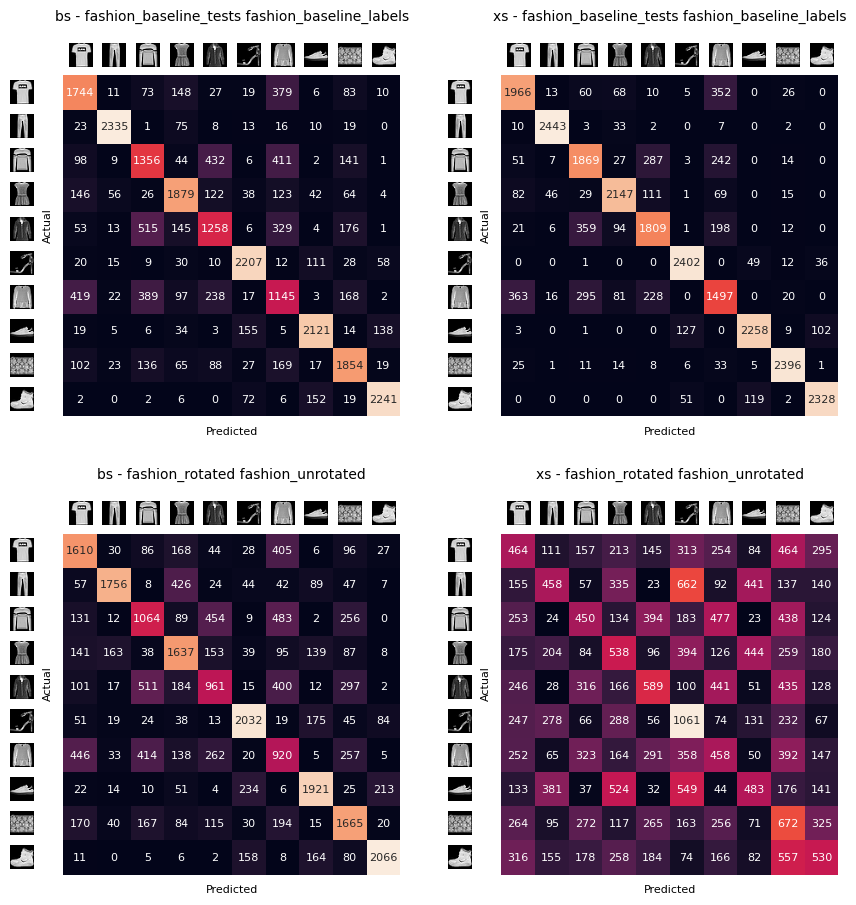

In [122]:
def build_rep_images(dataset):
    reps = {}
    for img_tensor, label in dataset:
        if label not in reps:
            reps[label] = img_tensor.squeeze(0).numpy()
            if len(reps) == 10:
                break
    return reps

rep_images_data1 = build_rep_images(utils_bw.fashion_mnist)  

def get_image_np(np_img):
    arr = np.asarray(np_img, dtype=float)
    if arr.max() > 1.0:
        arr = arr / 255.0
    return arr

# Example subset
df_sorted = best_per_group_unif2.sort_values(['data1', 'data2', 'feature']).head(4)

# Layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

extra_band = 1.2  # extra vertical space above the matrix for thumbnails

for ax, (idx, row) in zip(axes, df_sorted.iterrows()):
    conf_mat = row["metrics.confmat"]
    if isinstance(conf_mat, str):
        conf_mat = ast.literal_eval(conf_mat)
    conf_mat = np.asarray(conf_mat)
    n = conf_mat.shape[0]

    # Heatmap
    sns.heatmap(conf_mat, annot=True, fmt=".0f", cbar=False,
                annot_kws={"size": 8}, ax=ax)

    ax.set_title(f"{row['feature']} - {row['data1']} {row['data2']}", fontsize=10, pad=10)
    ax.set_xlabel("Predicted", fontsize=8)
    ax.set_ylabel("Actual", fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

    ax.set_xticks(np.arange(n) + 0.5)
    ax.set_yticks(np.arange(n) + 0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(length=0)

    # Reserve space above the top row
    ax.set_xlim(0, n)
    ax.set_ylim(n, -extra_band)  # extends top upward

    # Y-axis thumbnails (Actual)
    for i in range(min(n, 10)):
        if i in rep_images_data1:
            img = get_image_np(rep_images_data1[i])
            im = OffsetImage(img, cmap='gray', zoom=0.6)
            ab = AnnotationBbox(im, (0, i + 0.5),
                                xybox=(-30, 0), xycoords='data', boxcoords="offset points",
                                frameon=False, pad=0.0, clip_on=False)
            ax.add_artist(ab)

    # X-axis thumbnails (Predicted) inside extra band
    y_top = -extra_band / 2
    for j in range(min(n, 10)):
        if j in rep_images_data1:
            img = get_image_np(rep_images_data1[j])
            im = OffsetImage(img, cmap='gray', zoom=0.6)
            ab = AnnotationBbox(im, (j + 0.5, y_top),
                                xycoords='data',
                                frameon=False, pad=0.0, clip_on=False)
            ax.add_artist(ab)

plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.95)
plt.show()

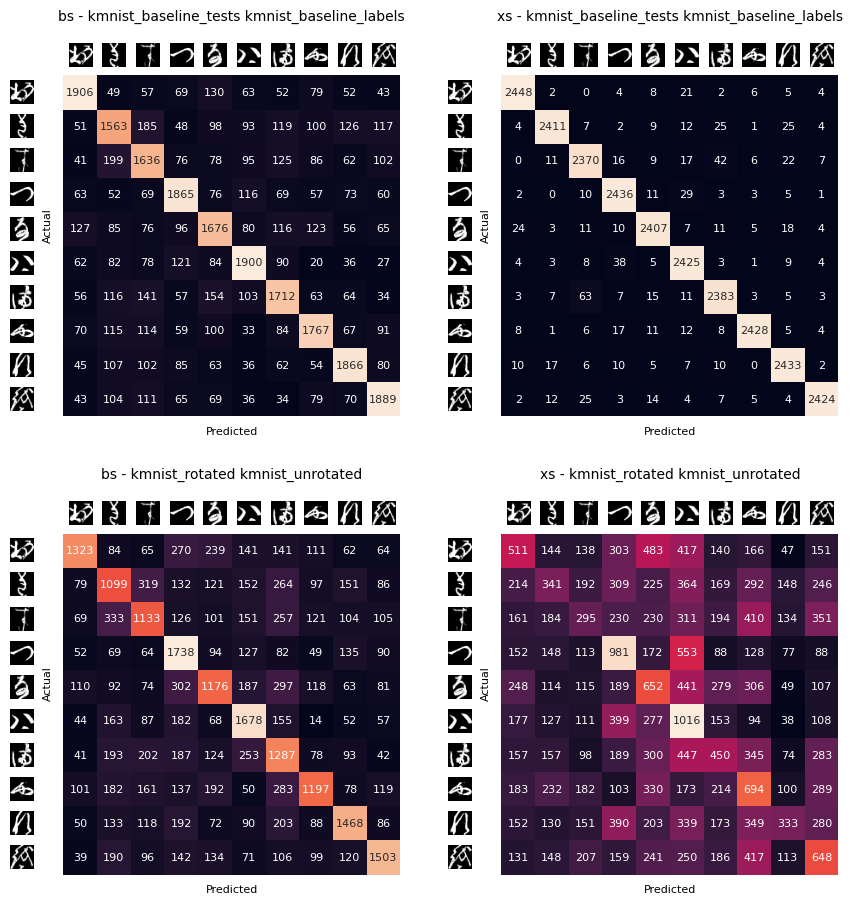

In [124]:
def build_rep_images(dataset):
    reps = {}
    for img_tensor, label in dataset:
        if label not in reps:
            reps[label] = img_tensor.squeeze(0).numpy()
            if len(reps) == 10:
                break
    return reps

rep_images_data1 = build_rep_images(utils_bw.kmnist)  

def get_image_np(np_img):
    arr = np.asarray(np_img, dtype=float)
    if arr.max() > 1.0:
        arr = arr / 255.0
    return arr

# Example subset
df_sorted = best_per_group_unif2.sort_values(['data1', 'data2', 'feature']).iloc[4:8]

# Layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

extra_band = 1.2  # extra vertical space above the matrix for thumbnails

for ax, (idx, row) in zip(axes, df_sorted.iterrows()):
    conf_mat = row["metrics.confmat"]
    if isinstance(conf_mat, str):
        conf_mat = ast.literal_eval(conf_mat)
    conf_mat = np.asarray(conf_mat)
    n = conf_mat.shape[0]

    # Heatmap
    sns.heatmap(conf_mat, annot=True, fmt=".0f", cbar=False,
                annot_kws={"size": 8}, ax=ax)

    ax.set_title(f"{row['feature']} - {row['data1']} {row['data2']}", fontsize=10, pad=10)
    ax.set_xlabel("Predicted", fontsize=8)
    ax.set_ylabel("Actual", fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

    ax.set_xticks(np.arange(n) + 0.5)
    ax.set_yticks(np.arange(n) + 0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(length=0)

    # Reserve space above the top row
    ax.set_xlim(0, n)
    ax.set_ylim(n, -extra_band)  # extends top upward

    # Y-axis thumbnails (Actual)
    for i in range(min(n, 10)):
        if i in rep_images_data1:
            img = get_image_np(rep_images_data1[i])
            im = OffsetImage(img, cmap='gray', zoom=0.6)
            ab = AnnotationBbox(im, (0, i + 0.5),
                                xybox=(-30, 0), xycoords='data', boxcoords="offset points",
                                frameon=False, pad=0.0, clip_on=False)
            ax.add_artist(ab)

    # X-axis thumbnails (Predicted) inside extra band
    y_top = -extra_band / 2
    for j in range(min(n, 10)):
        if j in rep_images_data1:
            img = get_image_np(rep_images_data1[j])
            im = OffsetImage(img, cmap='gray', zoom=0.6)
            ab = AnnotationBbox(im, (j + 0.5, y_top),
                                xycoords='data',
                                frameon=False, pad=0.0, clip_on=False)
            ax.add_artist(ab)

plt.subplots_adjust(wspace=0.3, hspace=0.2, top=0.95)
plt.show()

In [22]:
discretized2_path = "/Users/annabelma/Code/Dataset-Comparison-Underlying-Symmetries/cluster_experiments/mnist_gridsearch_discrete_angles/results_fixed/"

In [24]:
rows = []
for filename in os.listdir(discretized2_path):
    filepath = os.path.join(discretized2_path, filename)

    with open(filepath, "r") as f:
        data = json.load(f)

    rows.append(data)

discretized2 = pd.json_normalize(rows)

# Save if needed
discretized2.to_csv("/Users/annabelma/Code/Dataset-Comparison-Underlying-Symmetries/process_cluster_exp/discrete_mnist.csv", index=False)

In [27]:
best_per_group_discretized2 = (
    discretized2.sort_values('metrics.accuracy', ascending=False)
      .groupby(['data1','data2','feature'], as_index=False)
      .head(1)  
)

display(best_per_group_discretized2[['data1', 'data2', 'feature', 'method', 'reg', 'metrics.accuracy']].sort_values(['data1','data2','feature']))

,data1,data2,feature,method,reg,metrics.accuracy
22,fashion_baseline_labels,fashion_baseline_tests,bs,sinkhorn,0.01,0.725200
82,fashion_baseline_labels,fashion_baseline_tests,xs,greenkhorn,0.01,0.847160
18,fashion_unrotated,fashion_rotated,bs,sinkhorn,0.01,0.636080
119,fashion_unrotated,fashion_rotated,xs,greenkhorn,0.10,0.265080
78,kmnist_baseline_labels,kmnist_baseline_tests,bs,sinkhorn,0.01,0.711760
129,kmnist_baseline_labels,kmnist_baseline_tests,xs,sinkhorn,0.10,0.965280
231,kmnist_unrotated,kmnist_rotated,bs,sinkhorn,0.01,0.593880
146,kmnist_unrotated,kmnist_rotated,xs,greenkhorn,10.00,0.168840
172,mnist_baseline_labels,mnist_baseline_tests,bs,sinkhorn,0.01,0.803000
88,mnist_baseline_labels,mnist_baseline_tests,xs,greenkhorn,0.10,0.970800


In [35]:
display(best_per_group_discretized2[best_per_group_discretized2['feature'] == 'bs'][['data1', 'data2', 'feature', 'method', 'reg', 'metrics.accuracy']].sort_values(['data1','data2','feature']))

,data1,data2,feature,method,reg,metrics.accuracy
22,fashion_baseline_labels,fashion_baseline_tests,bs,sinkhorn,0.01,0.725200
18,fashion_unrotated,fashion_rotated,bs,sinkhorn,0.01,0.636080
78,kmnist_baseline_labels,kmnist_baseline_tests,bs,sinkhorn,0.01,0.711760
231,kmnist_unrotated,kmnist_rotated,bs,sinkhorn,0.01,0.593880
172,mnist_baseline_labels,mnist_baseline_tests,bs,sinkhorn,0.01,0.803000
85,mnist_unrotated,mnist_rotated,bs,sinkhorn_log,0.10,0.680700
199,mnist_usps_0,mnist_usps_rotated,bs,greenkhorn,0.10,0.318496
147,mnist_usps_0,usps_0,bs,greenkhorn,0.01,0.318496


# final processing of correct path !

In [128]:
final_path = "/Users/annabelma/Code/Dataset-Comparison-Underlying-Symmetries/cluster_experiments/final_mnist_exp/results"

In [132]:
rows = []
for filename in os.listdir(final_path):
    filepath = os.path.join(final_path, filename)

    with open(filepath, "r") as f:
        data = json.load(f)

    rows.append(data)

final_df = pd.json_normalize(rows)

# Save if needed
final_df.to_csv("/Users/annabelma/Code/Dataset-Comparison-Underlying-Symmetries/process_cluster_exp/final_mnist_experiment_results.csv", index=False)

In [213]:
final_df.columns

Index(['exp_file', 'data1', 'data2', 'feature', 'method', 'reg', 'metrics.n',
       'metrics.correct', 'metrics.accuracy', 'metrics.niter',
       'metrics.last_errs', 'metrics.elapsed_sec', 'metrics.method',
       'metrics.reg', 'metrics.feature', 'metrics.per_class_percent_correct',
       'metrics.per_class_support', 'metrics.confmat'],
      dtype='object')

In [217]:
best_per_group_final = (
    final_df.sort_values('metrics.accuracy', ascending=False)
      .groupby(['data1','data2','feature'], as_index=False)
      .head(1)  
)

display(best_per_group_final[['data1', 'data2', 'feature', 'method', 'reg', 'metrics.accuracy']].sort_values(['data1','data2','feature']))

,data1,data2,feature,method,reg,metrics.accuracy
198,fashion_baseline_tests,fashion_baseline_labels,bs,greenkhorn,0.01,0.709640
12,fashion_baseline_tests,fashion_baseline_labels,xs,sinkhorn_log,0.01,0.844600
106,fashion_rotated,fashion_unrotated,bs,sinkhorn_log,0.01,0.625280
137,fashion_rotated,fashion_unrotated,xs,sinkhorn_log,0.01,0.228120
90,kmnist_baseline_tests,kmnist_baseline_labels,bs,sinkhorn_log,0.01,0.711200
233,kmnist_baseline_tests,kmnist_baseline_labels,xs,greenkhorn,0.10,0.966600
2,kmnist_rotated,kmnist_unrotated,bs,sinkhorn_log,0.01,0.608320
14,kmnist_rotated,kmnist_unrotated,xs,sinkhorn_log,0.10,0.236840
107,mnist_baseline_tests,mnist_baseline_labels,bs,sinkhorn,0.01,0.750960
20,mnist_baseline_tests,mnist_baseline_labels,xs,sinkhorn_stabilized,0.10,0.962000


In [148]:
uniform_params = final_df[(final_df['method'] == 'greenkhorn') & (final_df['reg'] == 0.01)]

In [158]:
display(uniform_params[['data1', 'data2', 'feature', 'method', 'reg', 'metrics.accuracy']].sort_values(['data1','data2','feature']))

,data1,data2,feature,method,reg,metrics.accuracy
198,fashion_baseline_tests,fashion_baseline_labels,bs,greenkhorn,0.01,0.709640
208,fashion_baseline_tests,fashion_baseline_labels,xs,greenkhorn,0.01,0.842480
83,fashion_rotated,fashion_unrotated,bs,greenkhorn,0.01,0.599640
96,fashion_rotated,fashion_unrotated,xs,greenkhorn,0.01,0.227920
16,kmnist_baseline_tests,kmnist_baseline_labels,bs,greenkhorn,0.01,0.697040
33,kmnist_baseline_tests,kmnist_baseline_labels,xs,greenkhorn,0.01,0.954760
185,kmnist_rotated,kmnist_unrotated,bs,greenkhorn,0.01,0.596720
236,kmnist_rotated,kmnist_unrotated,xs,greenkhorn,0.01,0.229000
220,mnist_baseline_tests,mnist_baseline_labels,bs,greenkhorn,0.01,0.739480
205,mnist_baseline_tests,mnist_baseline_labels,xs,greenkhorn,0.01,0.944760


## building the heatmaps for the best per group

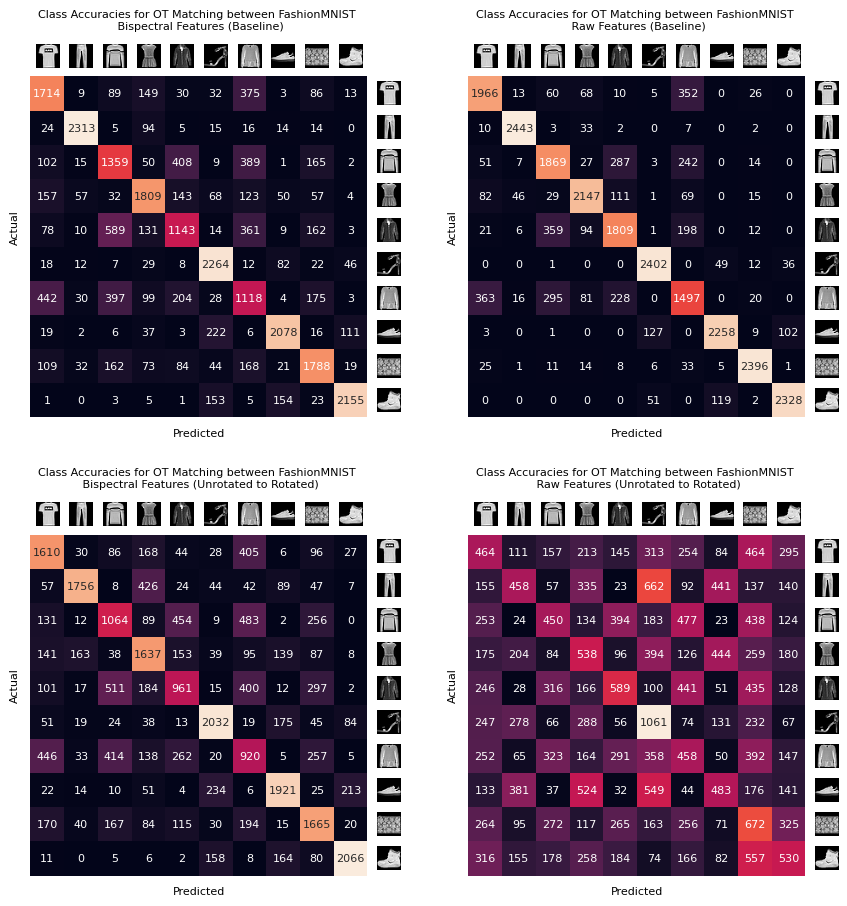

In [211]:
plot_conf_mats(best_per_group_final.sort_values(['data1', 'data2', 'feature']).head(4), rep_images_fashion, "FashionMNIST")

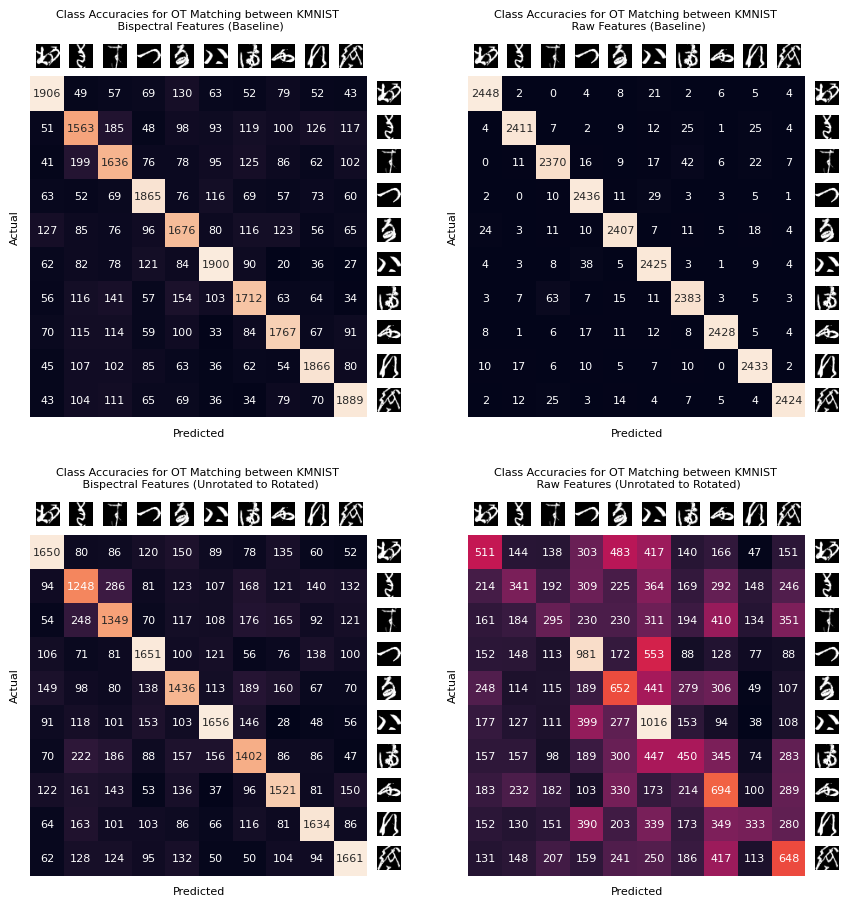

In [207]:
plot_conf_mats(best_per_group_final.sort_values(['data1', 'data2', 'feature']).iloc[4:8], rep_images_kmnist, "KMNIST")

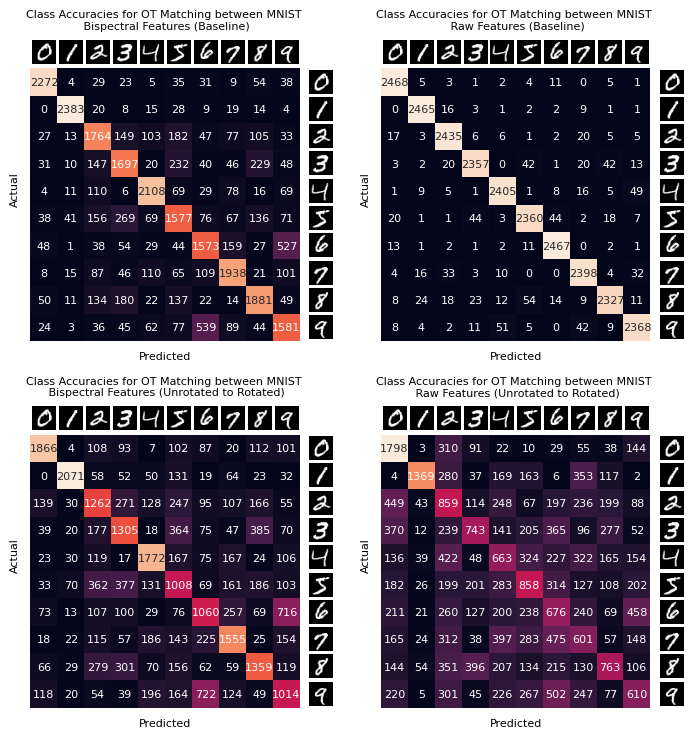

In [231]:
plot_conf_mats(best_per_group_final.sort_values(['data1', 'data2', 'feature']).iloc[8:12], rep_images_mnist, "MNIST")

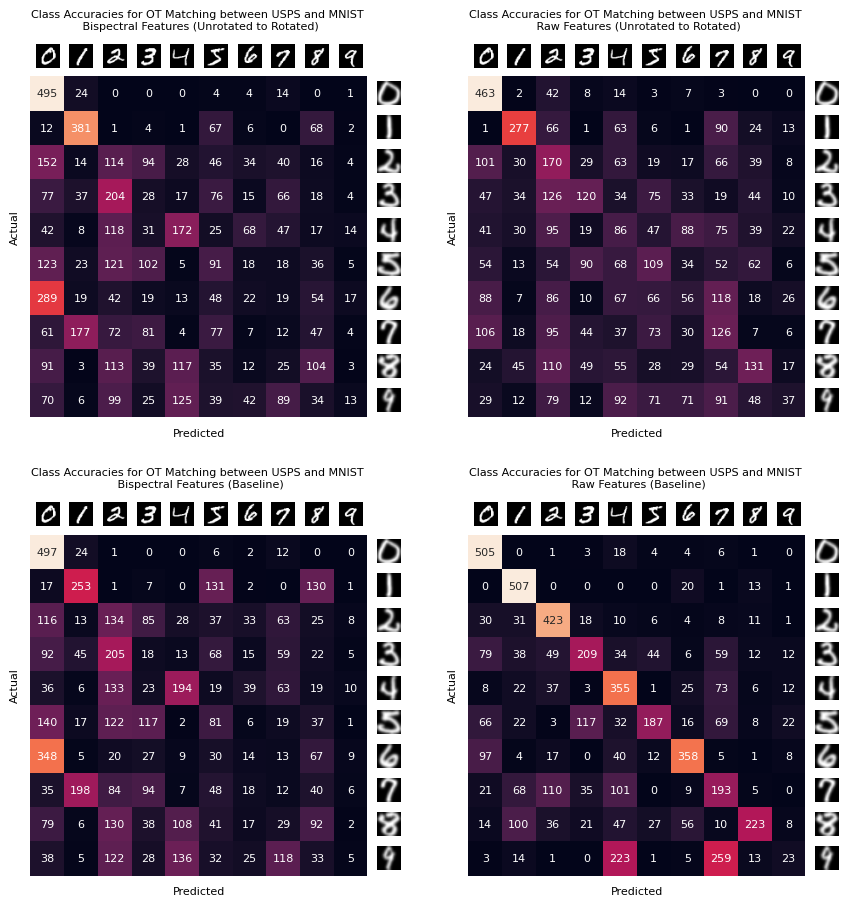

In [233]:
plot_conf_mats1(best_per_group_final.sort_values(['data1', 'data2', 'feature']).iloc[12:16], rep_images_usps, rep_images_mnist, "USPS and MNIST")

## plotting probabilities

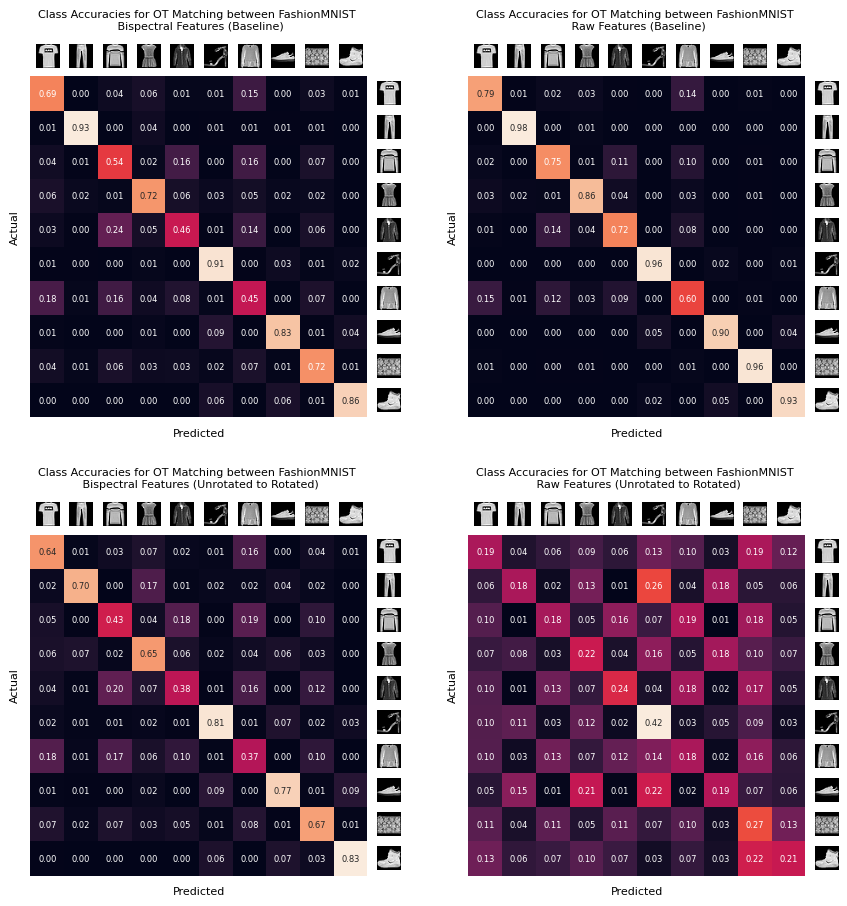

In [264]:
plot_conf_mats_probs(best_per_group_final.sort_values(['data1', 'data2', 'feature']).head(4), rep_images_fashion, "FashionMNIST")

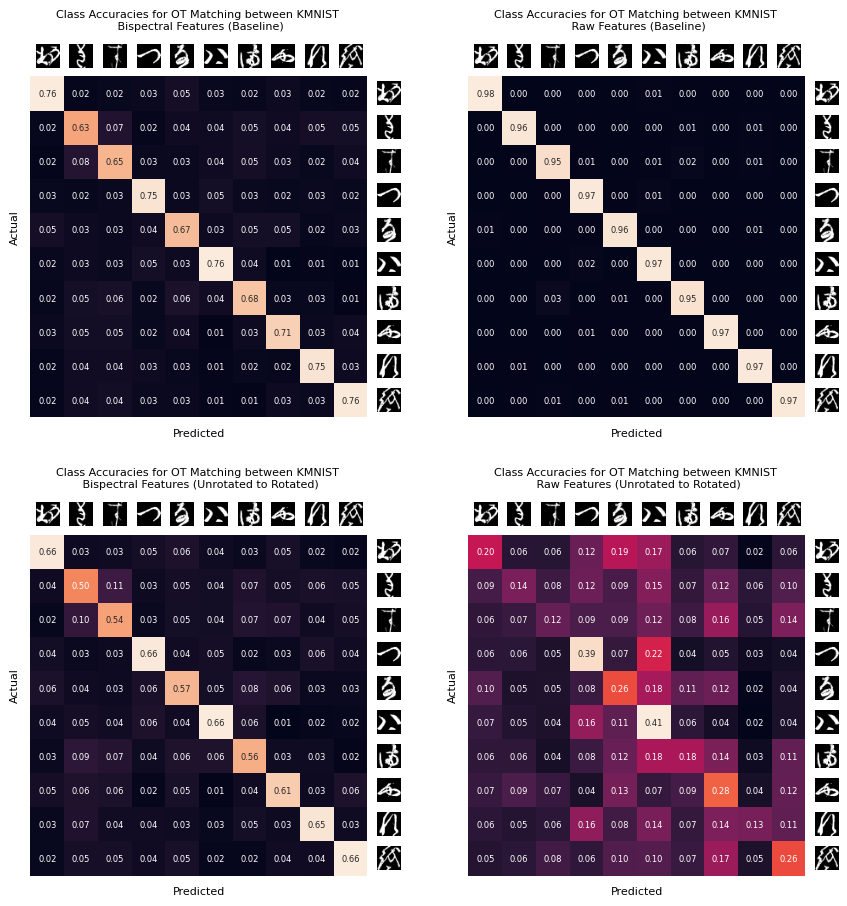

In [266]:
plot_conf_mats_probs(best_per_group_final.sort_values(['data1', 'data2', 'feature']).iloc[4:8], rep_images_kmnist, "KMNIST")

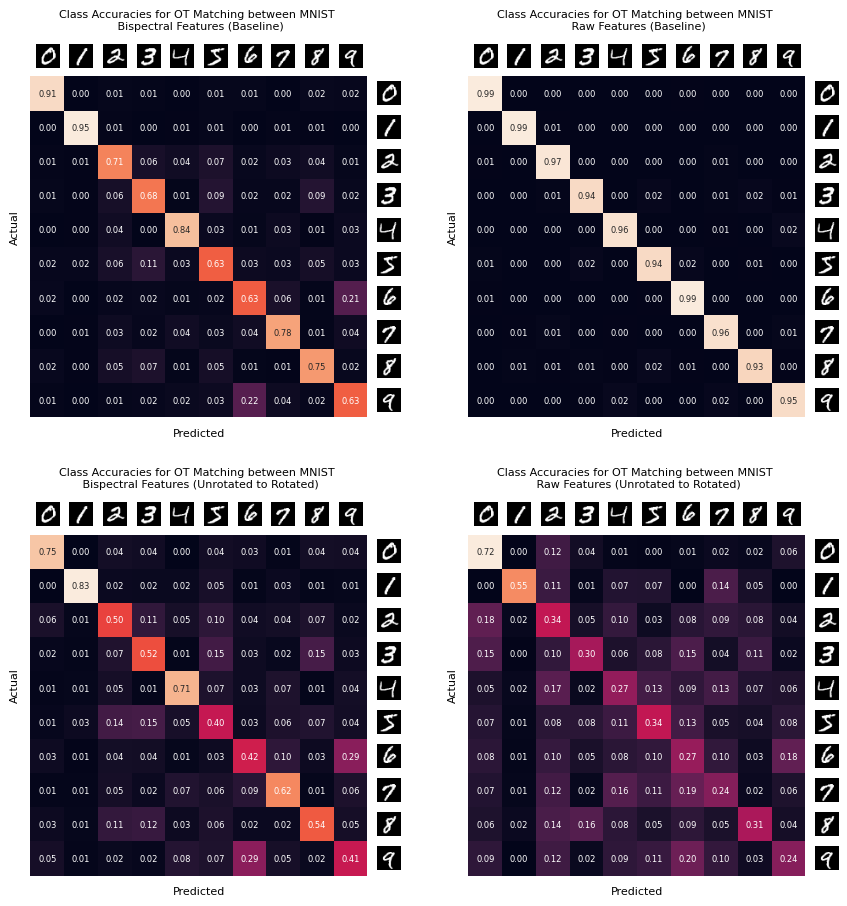

In [268]:
plot_conf_mats_probs(best_per_group_final.sort_values(['data1', 'data2', 'feature']).iloc[8:12], rep_images_mnist, "MNIST")

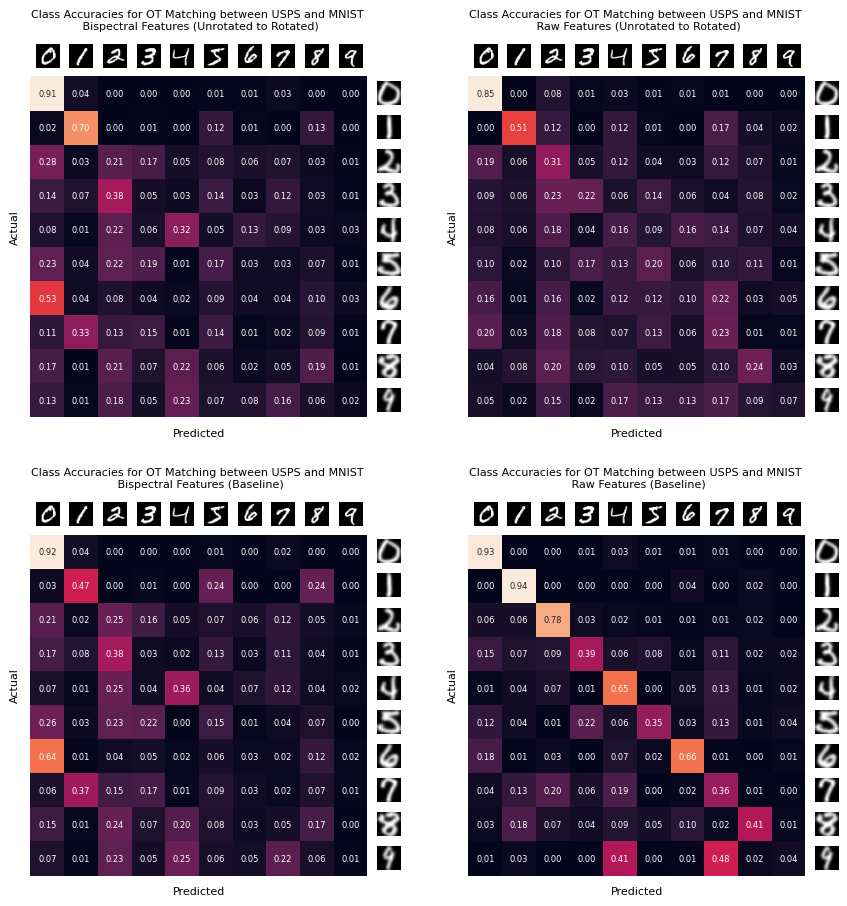

In [270]:
plot_conf_mats_probs1(best_per_group_final.sort_values(['data1', 'data2', 'feature']).iloc[12:16], rep_images_usps, rep_images_mnist, "USPS and MNIST")